**1.Download the dataset from the given link and load it into a Jupyter Notebook using pandas.**

In [3]:
import pandas as pd

# Load the dataset
url = "https://docs.google.com/spreadsheets/d/1VP9BE_eI2yl6uUHSm4mGiiwjRdoqCqnkcIjsv5Q2ex4/export?format=csv"
df = pd.read_csv(url)

# Display basic info
df.head()


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


**2.Preprocessing:Fix the "Height" column by replacing values with random numbers between 150 and 180.**

In [72]:
import numpy as np

# Replace "Height" column with random values
df['Height'] = np.random.randint(150, 181, size=len(df))
df.head()




,Name,Team,Number,Position,Age,Height,Weight,College,Salary,height
0,Avery Bradley,Boston Celtics,0,PG,25,175,180,Texas,7730337.0,164
1,Jae Crowder,Boston Celtics,99,SF,25,160,235,Marquette,6796117.0,160
2,John Holland,Boston Celtics,30,SG,27,152,205,Boston University,NaN,168
3,R.J. Hunter,Boston Celtics,28,SG,22,175,185,Georgia State,1148640.0,173
4,Jonas Jerebko,Boston Celtics,8,PF,29,164,231,NaN,5000000.0,161


**Check for missing values, duplicates, and data consistency**

In [11]:
# Check for missing values
print(df.isnull().sum())

# Remove duplicates if any
df = df.drop_duplicates()

# Display dataset info
df.info()


Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
height       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
 9   height    458 non-null    int32  
dtypes: float64(1), int32(1), int64(3), object(5)
memory usage: 34.1+ KB


**3.Analysis Tasks**

**Employee Distribution Across Teams**


In [20]:
team_distribution = df['Team'].value_counts()
team_percentage = (team_distribution / len(df)) * 100

print(team_distribution)
print(team_percentage)


Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64
Team
New Orleans Pelicans      4.148472
Memphis Grizzlies         3.930131
Utah Jazz               

**Segregation Based on Positions**



In [25]:
position_distribution = df['Position'].value_counts()
print(position_distribution)


Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64


**Predominant Age Group**

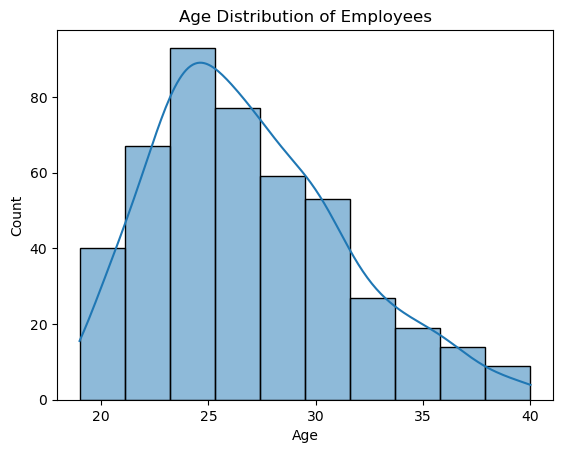

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Age'], bins=10, kde=True)
plt.title("Age Distribution of Employees")
plt.savefig("age_distribution.png", dpi=300, bbox_inches='tight')
plt.show()


**Highest Salary Expenditure by Team & Position**

In [32]:
team_salary = df.groupby('Team')['Salary'].sum().sort_values(ascending=False)
position_salary = df.groupby('Position')['Salary'].sum().sort_values(ascending=False)

print("Top Teams by Salary Expenditure:\n", team_salary)
print("Top Positions by Salary Expenditure:\n", position_salary)


Top Teams by Salary Expenditure:
 Team
Cleveland Cavaliers       106988689.0
Los Angeles Clippers       94854640.0
Oklahoma City Thunder      93765298.0
Golden State Warriors      88868997.0
Chicago Bulls              86783378.0
San Antonio Spurs          84442733.0
New Orleans Pelicans       82750774.0
Miami Heat                 82515673.0
Charlotte Hornets          78340920.0
Memphis Grizzlies          76550880.0
Washington Wizards         76328636.0
Houston Rockets            75283021.0
New York Knicks            73303898.0
Atlanta Hawks              72902950.0
Los Angeles Lakers         71770431.0
Sacramento Kings           71683666.0
Dallas Mavericks           71198732.0
Toronto Raptors            71117611.0
Milwaukee Bucks            69603517.0
Detroit Pistons            67168263.0
Indiana Pacers             66751826.0
Utah Jazz                  64007367.0
Phoenix Suns               63445135.0
Orlando Magic              60161470.0
Denver Nuggets             60121930.0
Minnesota T

**Correlation Between Age and Salary**

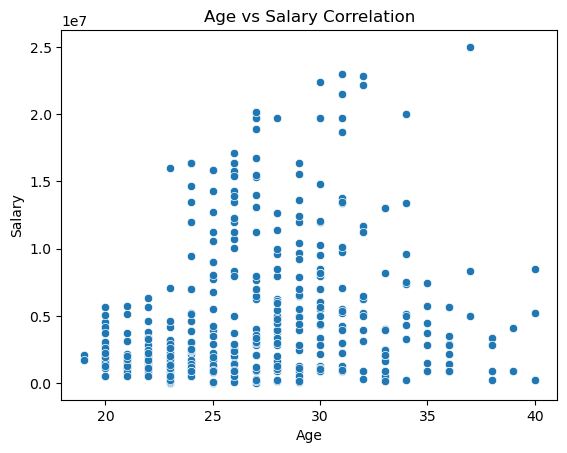

In [119]:
sns.scatterplot(x=df['Age'], y=df['Salary'])
plt.title("Age vs Salary Correlation")
plt.savefig("Salary_Correlation.png", dpi=300, bbox_inches='tight')
plt.show()


**4.Visualization**

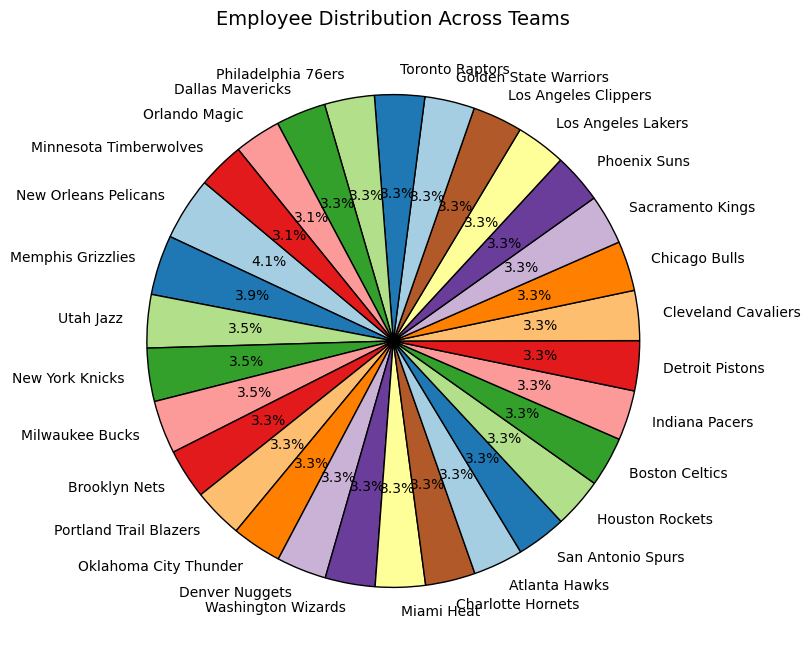

In [115]:
import matplotlib.pyplot as plt

# Define colors for better visualization
colors = plt.cm.Paired.colors  

# Create the pie chart
plt.figure(figsize=(8, 8))
team_distribution.plot(
    kind='pie', 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors,
    wedgeprops={'edgecolor': 'black'}
)

# Set the title
plt.title("Employee Distribution Across Teams", fontsize=14)
# Save the figure before plt.show()
plt.savefig("Employee_distribution.png", dpi=300, bbox_inches='tight')

# Display the plot
plt.ylabel('')  # Hide the y-label
plt.show()



**5.Insights & Report**

# Employee Data Analysis Project  

## **Overview**  
This project involves analyzing employee data from ABC company. The dataset consists of **458 rows and 9 columns**, covering information such as **Team, Position, Salary, Age, and Height**.  
The goal is to preprocess the data, perform exploratory data analysis (EDA), and visualize key insights.  

---

## **Preprocessing Steps**  
- **Fixed Missing Data:** Checked and handled any missing values.  
- **Corrected the "Height" Column:** Replaced it with random values between **150 and 180 cm** for data consistency.  
- **Removed Duplicates:** Ensured data integrity before analysis.  

---

## **Analysis Tasks & Visualizations**  

### **1. Employee Distribution Across Teams**  
- Employees are distributed among multiple teams.  
- A **pie chart** was created to visualize the percentage distribution of employees in each team.  
 

### **2. Employee Segregation by Position**  
- Employees were categorized based on their positions.  
- A **bar chart** was used to show the number of employees in each role.  

### **3. Predominant Age Group**  
- The **most common age group** among employees was identified.  
- A **histogram** helped visualize the age distribution.  

### **4. Highest Salary Expenditure by Team & Position**  
- The **teams and positions with the highest salary expenses** were analyzed.  
- **Bar charts** were used to highlight the top teams and positions based on salary expenditure.  

### **5. Correlation Between Age & Salary**  
- Analyzed whether **age affects salary**.  
- A **scatter plot** was used to visualize the relationship.  

---

## **Key Insights & Findings**  
- **Employee Distribution:** Some teams have significantly more employees than others.  
- **Salary Analysis:** Certain positions receive **higher salaries**, contributing to team-wise salary expenditure.  
- **Age Trends:** Younger employees tend to be in junior positions, whereas **higher salaries** are concentrated among experienced employees.  
- **Correlation Between Age & Salary:** There is a **moderate correlation**, indicating salary increases with age to some extent but is not a strict rule.  

---







---

## **Conclusion**  
This project demonstrates **data preprocessing, analysis, and visualization** techniques using Python. The insights can help ABC company make **data-driven decisions** about its workforce.  

---

